In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

from keras.layers import Dropout

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

# Data Handling & Feature Engineering

In [102]:
# import data set
df = pd.read_csv('D:/Master/AN_2/Sem 2/Modele cu ec. structurale/kc_house_data/kc_house_data.csv')

In [153]:
# description of the data

# This dataset contains house sale prices for King County, which includes Seattle. 
# It includes homes sold between May 2014 and May 2015.

# Variables:

# id - A notation for a house
# date - Date house was sold
# price - The price at which the house was sold
# bedrooms - Number of Bedrooms/House
# bathrooms - Number of bathrooms/bedrooms
# sqft_living - Square footage of the home
# sqft_lot - Square footage of the lot
# floors - Total floors (levels) in house
# waterfront - House which has a view to a waterfront
# view - An index from 0 to 4 of how good the view of the property was ??
# condition - How good the condition is (Overall)
# grade - Overall grade given to the housing unit, based on King County grading system
# sqft_above - Square footage of house apart from basement
# sqft_basement - Square footage of the basement
# yr_built - Built Year
# yr_renovated - Year when house was renovated
# zipcode - Zip code
# lat - Latitude coordinate
# long - Longitude coordinate
# sqft_living15 - Living room area in 2015 (implies – some renovations) This might or might not have affected the lot size area ??
# sqft_lot15 - Lot size area in 2015 (implies – some renovations) ??

In [103]:
df.shape

(21613, 21)

In [104]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [105]:
df.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [106]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [107]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('id')
df.price = df.price.astype(int)
df.bathrooms = df.bathrooms.astype(int)
df.floors = df.floors.astype(int)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000,3,2,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [108]:
df['house_age'] = df['date'].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)

df=df.drop('date', axis=1)
df=df.drop('yr_renovated', axis=1)
df=df.drop('yr_built', axis=1)

df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
id,,,,,,,,,,,,,,,,,,,
7129300520,221900,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,59,0
6414100192,538000,3,2,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,63,1
5631500400,180000,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,82,0
2487200875,604000,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,49,0
1954400510,510000,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,28,0


In [109]:
# pd.set_option('precision', 2)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,43.317818,0.042289
std,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,0.138564,0.140828,685.391304,27304.179631,29.375493,0.201253
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,-1.000000,0.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,18.000000,0.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,40.000000,0.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,63.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.000000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,115.000000,1.000000


In [110]:
# picking out the relevant attributes for regression modelling

correlation = df.corr(method='pearson')
print(correlation)
columns = correlation.nlargest(10, 'price').index
columns

                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.510072     0.702035  0.089661  0.237211   
bedrooms       0.308350  1.000000   0.467452     0.576671  0.031703  0.155643   
bathrooms      0.510072  0.467452   1.000000     0.697875  0.085310  0.484822   
sqft_living    0.702035  0.576671   0.697875     1.000000  0.172826  0.353321   
sqft_lot       0.089661  0.031703   0.085310     0.172826  1.000000 -0.008951   
floors         0.237211  0.155643   0.484822     0.353321 -0.008951  1.000000   
waterfront     0.266369 -0.006582   0.058798     0.103818  0.021604  0.019640   
view           0.397293  0.079532   0.177257     0.284611  0.074710  0.024658   
condition      0.036362  0.028472  -0.126016    -0.058753 -0.008958 -0.293173   
grade          0.667434  0.356967   0.606631     0.762704  0.113621  0.472608   
sqft_above     0.605567  0.477600   0.639933     0.876597  0.183512  0.517913   
sqft_basement  0.323816  0.3

Index(['price', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15',
       'bathrooms', 'view', 'sqft_basement', 'bedrooms', 'lat'],
      dtype='object')

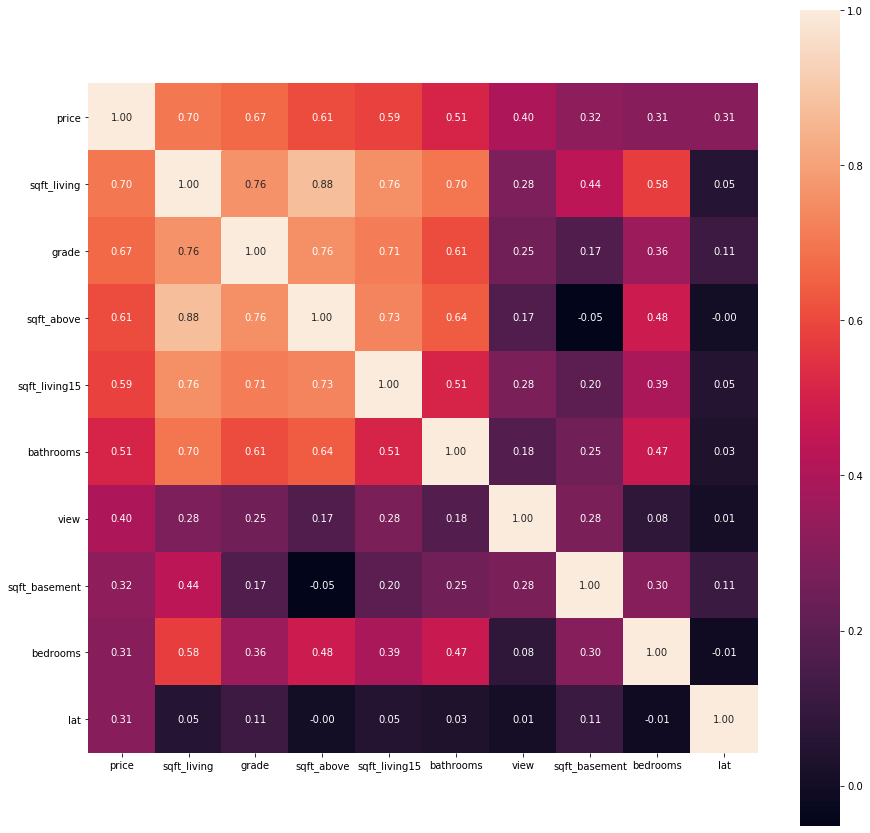

In [111]:
correlation_map = np.corrcoef(df[columns].values.T)

plt.subplots(figsize=(15,15))

heatmap = sns.heatmap(correlation_map, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
heatmap.set_ylim(10, 0)

plt.show()

In [112]:
df[columns].dtypes

price              int32
sqft_living        int64
grade              int64
sqft_above         int64
sqft_living15      int64
bathrooms          int32
view               int64
sqft_basement      int64
bedrooms           int64
lat              float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247151CF488>,
      dtype=object)

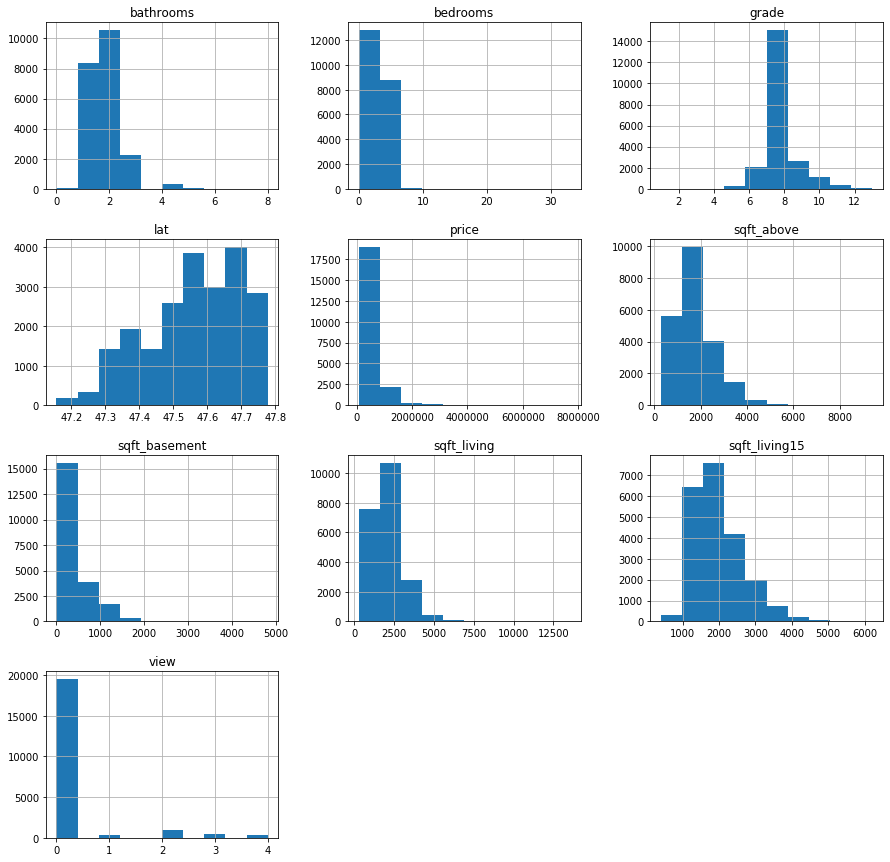

In [113]:
df[columns].hist(figsize=(15,15), bins=10)

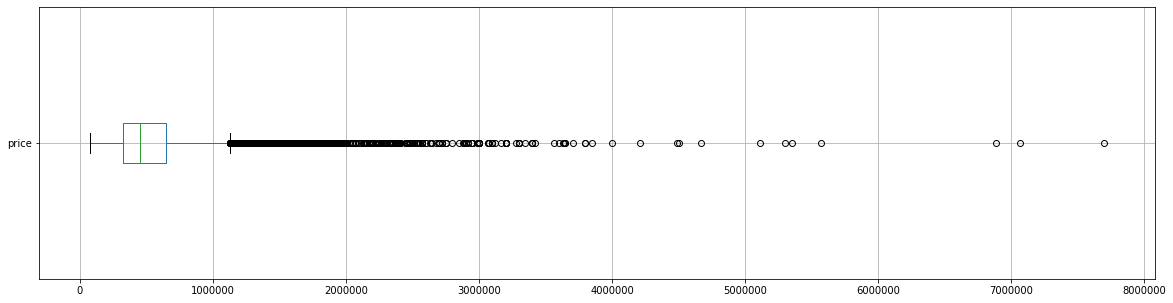

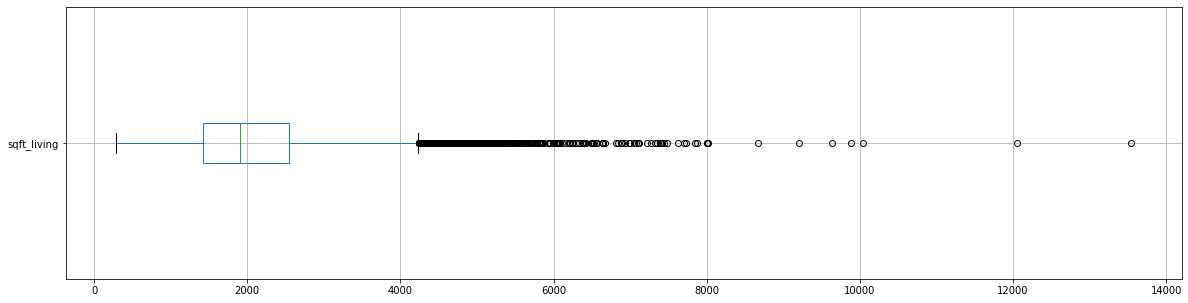

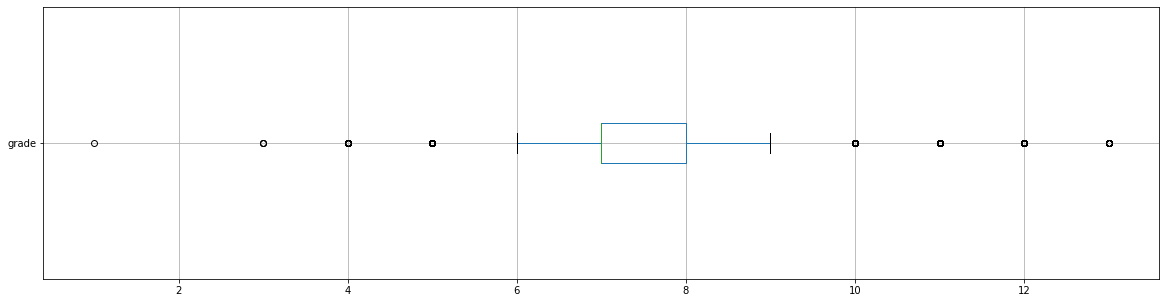

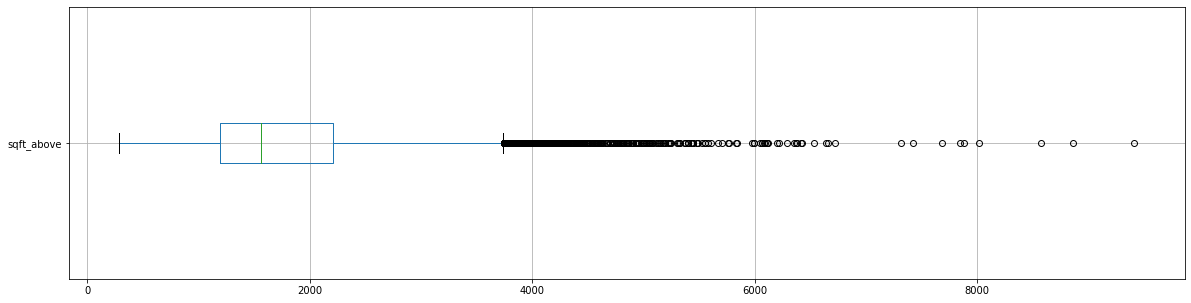

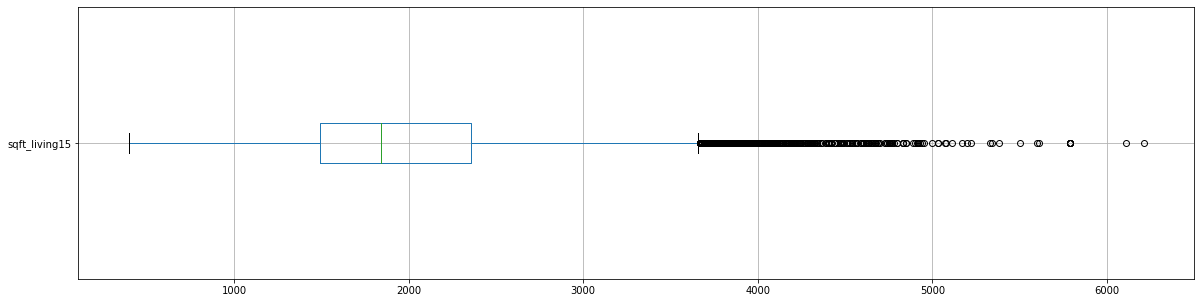

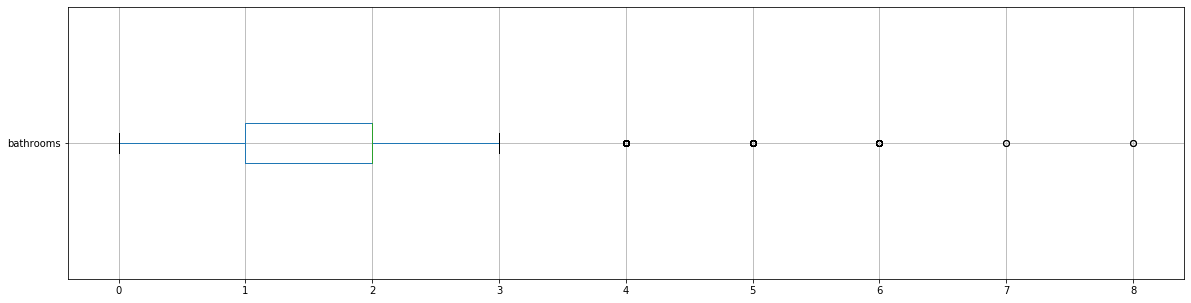

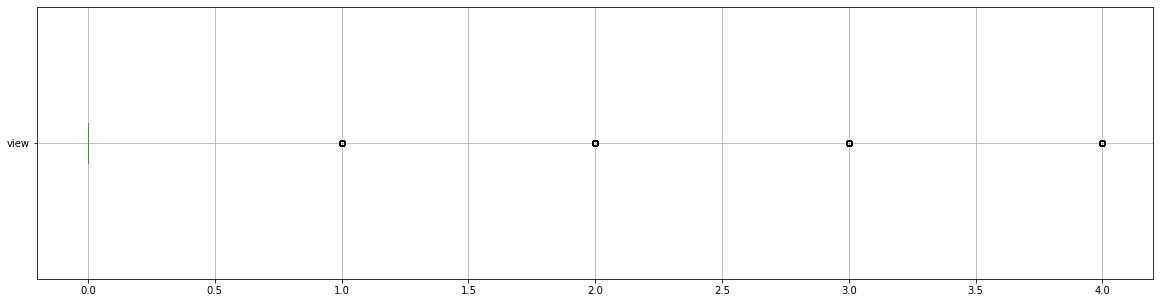

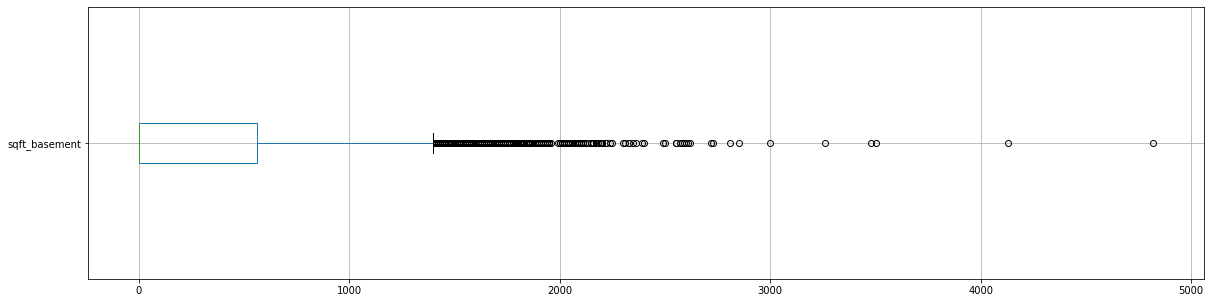

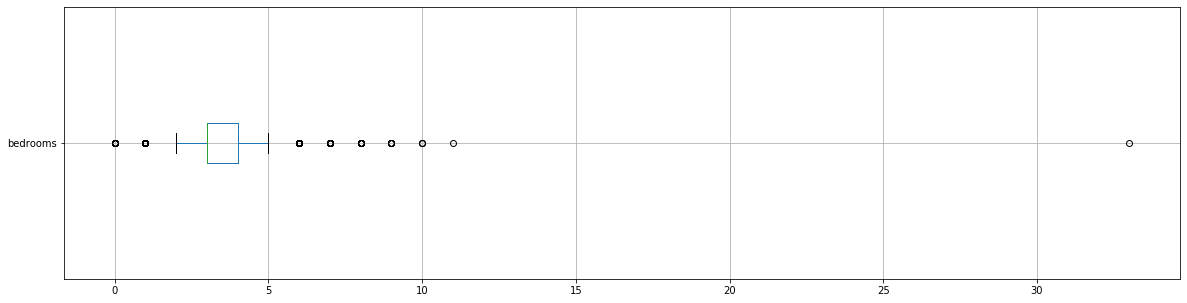

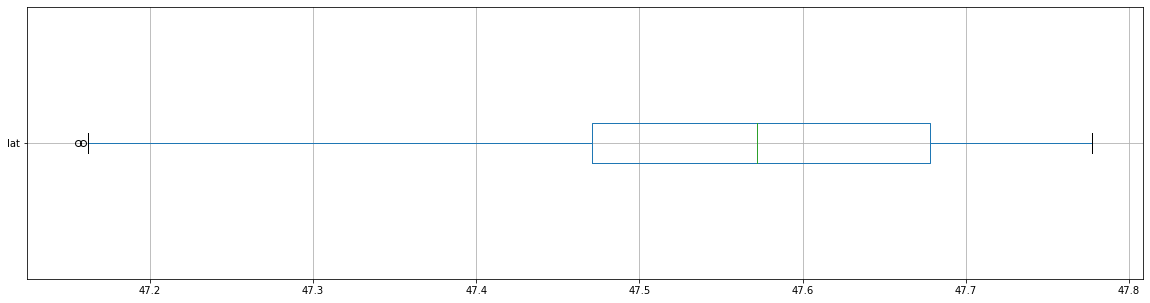

In [114]:
# check for outliers

for column in columns:
    plt.figure(figsize=(20,5))
    df.boxplot([column], vert=False)

In [115]:
# remove outliers

# price (>6000000)
df = df.drop(df[df['price'] > 6000000].index)
df = df.reset_index(drop=True)

# sqft_living (>10000)
df = df.drop(df[df['sqft_living'] > 10000].index)
df = df.reset_index(drop=True)

# sqft_above (>8000)
df = df.drop(df[df['sqft_above'] > 8000].index)
df = df.reset_index(drop=True)

# sqft_living15 (>6000)
df = df.drop(df[df['sqft_living15'] > 6000].index)
df = df.reset_index(drop=True)

# sqft_basement (>4000)
df = df.drop(df[df['sqft_basement'] > 4000].index)
df = df.reset_index(drop=True)

df.shape

(21605, 19)

# Multiple Linear Regression With Assumptions Taken In Consideration

Small Multicollinearity

In [116]:
# separate variables

X_0 = df[columns]
Y_0 = X_0['price']

X_0 = X_0.drop('price', axis = 1)

In [117]:
names_0 = list(X_0.columns.values)
names_0

['sqft_living',
 'grade',
 'sqft_above',
 'sqft_living15',
 'bathrooms',
 'view',
 'sqft_basement',
 'bedrooms',
 'lat']

In [118]:
# vif quantifies the severity of multicollinearity in an ordinary least squares regression analysis
# a rule of thumb is that if vif > 10 => multicollinearity is high

for i in range(0, len(names_0)):
    y = X_0.loc[:, X_0.columns == names_0[i]]
    x = X_0.loc[:, X_0.columns != names_0[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1-rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names_0[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names_0[i], vif
        )
    )

R Square value of sqft_living column is 1.0 keeping all other columns as features
Variance Inflation Factor of sqft_living column is inf 

R Square value of grade column is 0.99 keeping all other columns as features
Variance Inflation Factor of grade column is 130.61 

R Square value of sqft_above column is 1.0 keeping all other columns as features
Variance Inflation Factor of sqft_above column is inf 

R Square value of sqft_living15 column is 0.96 keeping all other columns as features
Variance Inflation Factor of sqft_living15 column is 25.79 

R Square value of bathrooms column is 0.93 keeping all other columns as features
Variance Inflation Factor of bathrooms column is 13.74 

R Square value of view column is 0.21 keeping all other columns as features
Variance Inflation Factor of view column is 1.27 

R Square value of sqft_basement column is 1.0 keeping all other columns as features
Variance Inflation Factor of sqft_basement column is inf 

R Square value of bedrooms column is 0.

C:\Users\Bogdan\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [119]:
# according the above results, we should remove some variables (due to existence of high multicollinearity)
# we will remove the following variables: sqft_above, sqft_living15, sqft_basement, lat, grade
# and then we will check again for multicollinearity

X_1 = df[columns]
Y_1 = X_1['price']

X_1 = X_1.drop('price', axis = 1)
X_1 = X_1.drop('sqft_above', axis = 1)
X_1 = X_1.drop('sqft_living15', axis = 1)
X_1 = X_1.drop('sqft_basement', axis = 1)
X_1 = X_1.drop('lat', axis = 1)
X_1 = X_1.drop('grade', axis = 1)

names_1 = list(X_1.columns.values)

for i in range(0, len(names_1)):
    y = X_1.loc[:, X_1.columns == names_1[i]]
    x = X_1.loc[:, X_1.columns != names_1[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1-rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            names_1[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            names_1[i], vif
        )
    )

R Square value of sqft_living column is 0.93 keeping all other columns as features
Variance Inflation Factor of sqft_living column is 15.21 

R Square value of bathrooms column is 0.92 keeping all other columns as features
Variance Inflation Factor of bathrooms column is 12.56 

R Square value of view column is 0.17 keeping all other columns as features
Variance Inflation Factor of view column is 1.2 

R Square value of bedrooms column is 0.91 keeping all other columns as features
Variance Inflation Factor of bedrooms column is 11.13 



Linear Relationship

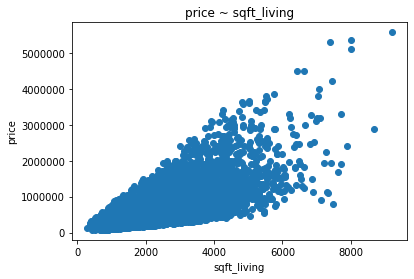

In [120]:
# we should find a linear relationship between the independent and dependent variables

# Plot 1

plt.scatter(X_1['sqft_living'], Y_1)
plt.title('price ~ sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

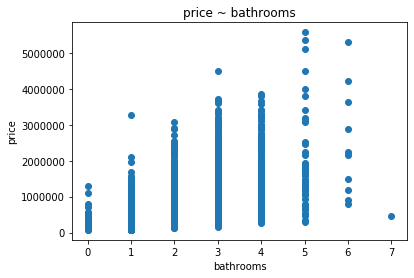

In [121]:
# Plot 2

plt.scatter(X_1['bathrooms'], Y_1)
plt.title('price ~ bathrooms')
plt.xlabel('bathrooms')
plt.ylabel('price')
plt.show()

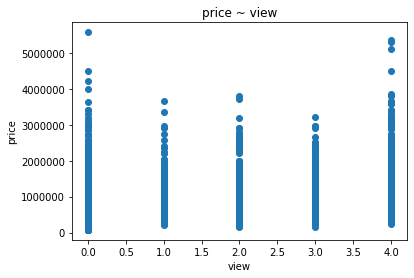

In [122]:
# Plot 3 (we don't have a linear relationship in this case)

plt.scatter(X_1['view'], Y_1)
plt.title('price ~ view')
plt.xlabel('view')
plt.ylabel('price')
plt.show()

In [123]:
X_1 = X_1.drop('view', axis = 1)

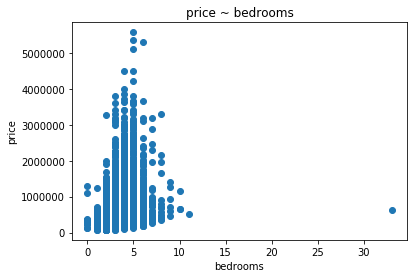

In [124]:
# Plot 4

plt.scatter(X_1['bedrooms'], Y_1)
plt.title('price ~ bedrooms')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.show()

Check If Variables Follow A Normal Distribution

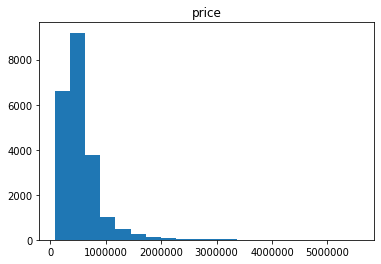

In [125]:
# Y_1.hist(figsize = (5,5), bins = 20)
plt.hist(Y_1, 20)
plt.title('price')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024719039948>,
      dtype=object)

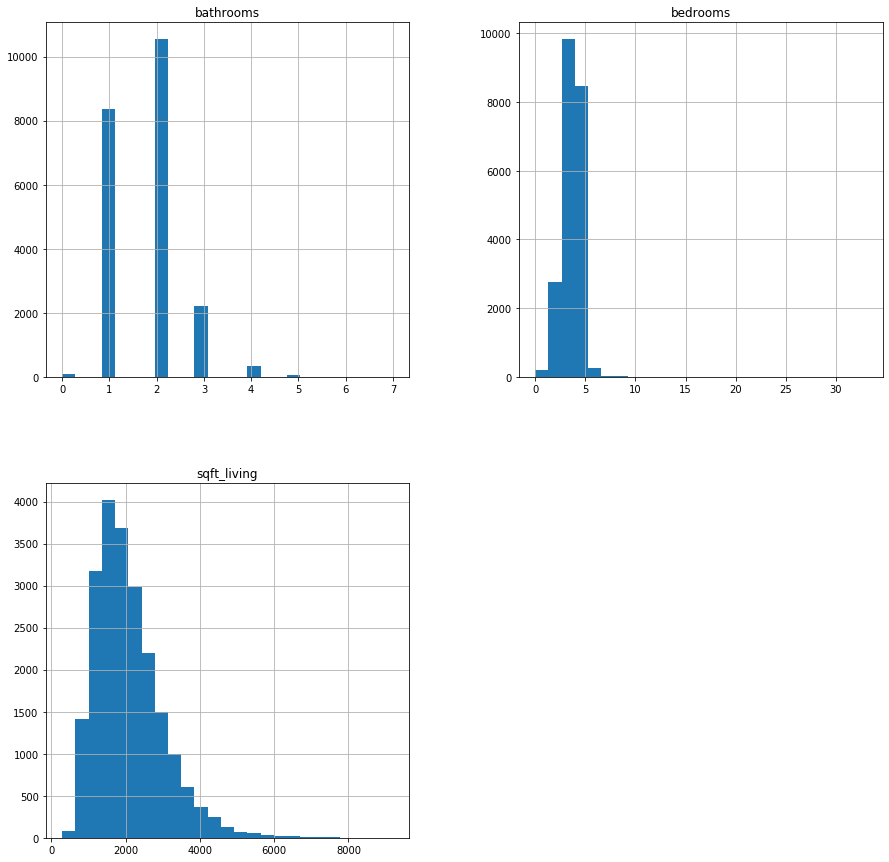

In [126]:
X_1[list(X_1.columns.values)].hist(figsize = (15,15), bins = 25)

In [127]:
# when the data is not normally distributed, a non-linear transformation (e.g., log-transformation) might fix this issue
# we can leave 'bathrooms' and 'bedrooms' variables like this because they can be considered as being categorical

Y_1 = np.log(Y_1)
X_1['sqft_living'] = np.log(X_1['sqft_living'])

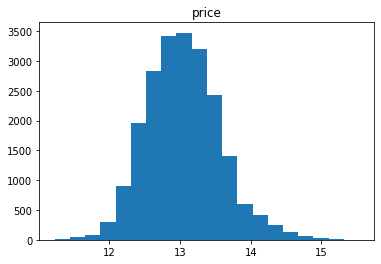

In [128]:
# Y_1.hist(figsize = (5,5), bins = 20)
plt.hist(Y_1, 20)
plt.title('price')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247183DF888>,
      dtype=object)

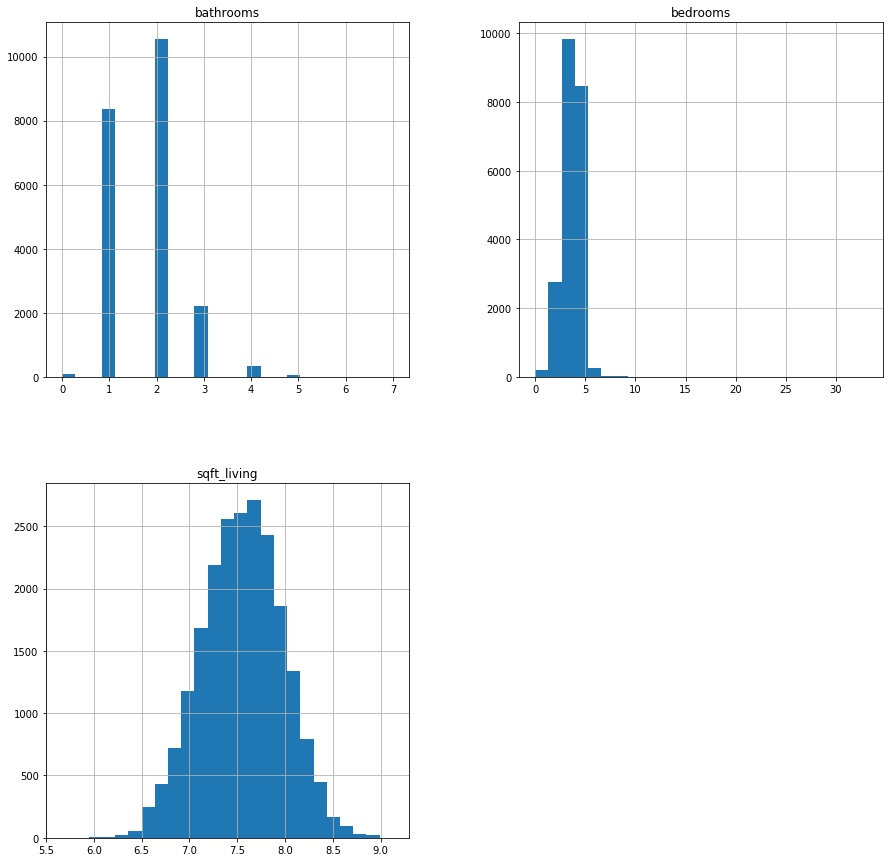

In [129]:
X_1[list(X_1.columns.values)].hist(figsize = (15,15), bins = 25)

Build The Model That Respects The Assumptions

In [130]:
# splitting dataset into training and testing datasets

X_1_train, X_1_test, Y_1_train, Y_1_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 42)

In [131]:
scaler = StandardScaler().fit(X_1_train)
rescaled_X_1_train = scaler.transform(X_1_train)
lr_model = LinearRegression()
lr_model.fit(rescaled_X_1_train, Y_1_train)

# transform the validation dataset
rescaled_X_1_test = scaler.transform(X_1_test)
predictions = lr_model.predict(rescaled_X_1_test)

# check the difference
print(mean_squared_error(Y_1_test, predictions))

0.14807546232979196


In [132]:
compare = pd.DataFrame({'Predictions': predictions, 'Test Data' : Y_1_test})
compare.head(10)

,Predictions,Test Data
18165,12.588358,12.733755
11853,13.223719,13.458836
17572,12.455589,12.296827
6407,12.836997,13.244581
15366,13.073942,13.213118
8049,13.520885,13.287878
19381,12.672868,13.049793
4851,12.842508,12.205823
9382,12.652514,12.937238
5846,13.319340,13.244581


In [133]:
actual_y_test = np.exp(Y_1_test)
actual_predicted = np.exp(predictions)

residuals = abs(actual_y_test) - abs(actual_predicted)

compare_actual_values = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Residuals' : residuals})
compare_actual_values = compare_actual_values.astype(int)
compare_actual_values.head(10)

,Test Data,Predicted Price,Residuals
18165,338999,293126,45873
11853,700000,553335,146664
17572,219000,256680,-37680
6407,564999,375869,189130
15366,547500,476366,71133
8049,590000,744810,-154810
19381,464999,318975,146024
4851,199950,377946,-177996
9382,415500,312548,102951
5846,564999,608857,-43857


Check if the model with one predictor is better than the model with more predictors

In [134]:
# splitting dataset into training and testing datasets

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_1['sqft_living'], Y_1, test_size = 0.20, random_state = 42)

In [135]:
X_2_train = X_2_train.values.reshape(-1, 1)
X_2_test = X_2_test.values.reshape(-1, 1)

scaler_2 = StandardScaler().fit(X_2_train)
rescaled_X_2_train = scaler_2.transform(X_2_train)
rescaled_X_2_test = scaler_2.transform(X_2_test)

lr_model_2 = LinearRegression()
lr_model_2.fit(rescaled_X_2_train, Y_2_train)

# transform the validation dataset
predictions_2 = lr_model_2.predict(rescaled_X_2_test)

# check the difference
print(mean_squared_error(Y_2_test, predictions_2))

0.14946597713463788


In [136]:
# the model with one predictor is not better than the model with more predictors

 No Autocorrelation

In [137]:
# this assumes no autocorrelation of the error terms 
# autocorrelation being present typically indicates that 
# we are missing some information that should be captured by the model

# our residuals are stored in 'Residuals' column
compare_actual_values.head(10)

,Test Data,Predicted Price,Residuals
18165,338999,293126,45873
11853,700000,553335,146664
17572,219000,256680,-37680
6407,564999,375869,189130
15366,547500,476366,71133
8049,590000,744810,-154810
19381,464999,318975,146024
4851,199950,377946,-177996
9382,415500,312548,102951
5846,564999,608857,-43857


In [138]:
print('\nPerforming Durbin-Watson Test')
print('\n')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

durbin_watson_value = durbin_watson(compare_actual_values['Residuals'])

print('Durbin-Watson:', durbin_watson_value)

if durbin_watson_value < 1.5:
    print('Signs of positive autocorrelation', '\n')
    print('Assumption not satisfied')
elif durbin_watson_value > 2.5:
    print('Signs of negative autocorrelation', '\n')
    print('Assumption not satisfied')
else:
    print('Little to no autocorrelation', '\n')
    print('Assumption satisfied')


Performing Durbin-Watson Test


Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 0.83077324657574
Signs of positive autocorrelation 

Assumption not satisfied


In [ ]:
# we don't need to worry about this assumption because we don't have serial data

Homoscedasticity of Error Terms

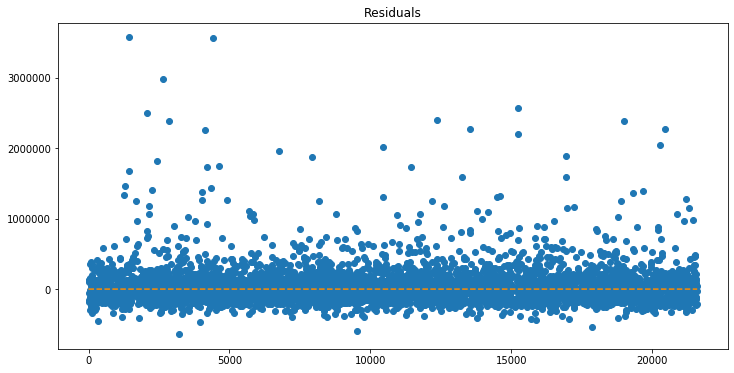

In [139]:
# Plotting the residuals

plt.subplots(figsize = (12, 6))
plt.scatter(x = compare_actual_values.index, y = compare_actual_values.Residuals)
plt.plot(np.repeat(0, compare_actual_values.index.max()), color = 'darkorange', linestyle = '--')
plt.title('Residuals')
plt.show() 

In [ ]:
# it seems that we don't have problems with the variance across the error terms

# Multiple Linear Regression

In [146]:
# separate variables

X = df[columns]
Y = X['price'].values
X = X.drop('price', axis = 1).values

In [147]:
# splitting dataset into training and testing datasets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [148]:
# the differing scales of the raw data may impact these algorithms =>
# part of a requirement for a standardised data set is to have each attribute have a mean value of zero and 
# a standard deviation of 1

pipelines = []

pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))

results = []
names = []

# https://machinelearningmastery.com/k-fold-cross-validation/
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -0.074782 (0.003396)
ScaledLASSO: -0.273675 (0.011033)


In [143]:
# it seems that 2 variables - price and sqft_living - are large and they affected the absolute numbers of the regression model =>
# to manage this, I will normalise the data using log

df['price'] = np.log(df['price'])
df['sqft_living'] = np.log(df['sqft_living'])

In [149]:
# linear regression obtained a better result => we will go further on with this model

scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
lr_model = LinearRegression()
lr_model.fit(rescaled_X_train, Y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = lr_model.predict(rescaled_X_test)

# check the difference
print(mean_squared_error(Y_test, predictions))

0.07414158761587555


In [150]:
# from the mean square error of 0.074 between the prediction outputs vs the test data, 
# we can conclude that the LR performed well
# important to note that the mean_square_error is calculated using the scaled data
# it does NOT represent the error between the actual house prices and predicted prices
# to better appreciate the outcome of the predictions, I look at the raw predicted values and the corresponding test data

compare = pd.DataFrame({'Predictions': predictions, 'Test Data' : Y_test})
compare.head(10)

,Predictions,Test Data
0,12.814053,12.733755
1,13.439890,13.458836
2,12.591438,12.296827
3,12.844764,13.244581
4,13.099977,13.213118
5,13.256721,13.287878
6,12.903512,13.049793
7,12.436853,12.205823
8,12.796937,12.937238
9,13.549182,13.244581


In [151]:
# looking at the data frame output above, we can conclude that the difference between the predicted value and test data is pretty small
# take note that the data is scaled and log normalised !
# so, we have to inverse transform these results

actual_y_test = np.exp(Y_test)
actual_predicted = np.exp(predictions)
diff = abs(actual_y_test - actual_predicted)

compare_actual_values = pd.DataFrame({'Test Data': actual_y_test, 'Predicted Price' : actual_predicted, 'Difference' : diff})
compare_actual_values = compare_actual_values.astype(int)
compare_actual_values.head(10)

,Test Data,Predicted Price,Difference
0,338999,367343,28343
1,700000,686862,13137
2,219000,294030,75030
3,564999,378800,186199
4,547500,488931,58568
5,590000,571901,18098
6,464999,401720,63279
7,199950,251916,51966
8,415500,361109,54390
9,564999,766187,201187


# Neural Network

In [152]:
import keras
from keras.layers import Dense
from keras.models import Sequential
# stop training when a monitored quantity has stopped improving
# patience: number of epochs that produced the monitored quantity with no improvement after which training will be stopped
from keras.callbacks import EarlyStopping

In [388]:
early_stopping_monitor = EarlyStopping(patience = 200)

predictors = rescaled_X_train
target = Y_train

# build the model
n_cols = predictors.shape[1] # 9

model = Sequential()
model.add(Dense(32, activation = 'relu', input_shape = (n_cols,)))
model.add(Dropout(0.25))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(1))

# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fit the model
hist = model.fit(predictors, 
                 target, 
                 epochs = 1000, 
                 validation_split = 0.2, 
                 callbacks = [early_stopping_monitor], 
                 verbose = False)

In [389]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 32)                320       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_146 (Dense)            (None, 64)                2112      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_147 (Dense)            (None, 32)                2080      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 33        
Total para

In [390]:
hist.history.keys()
hist.history

{'val_loss': [2.450213231661432,
  1.164600293588735,
  0.2790007673027262,
  0.38069500531898887,
  0.1646162907466064,
  0.2708508756069915,
  0.12497092700690798,
  0.13942498874726378,
  0.08622657671669917,
  0.15823484320351938,
  0.28757884792046284,
  0.15518399510755682,
  0.07524618590916034,
  0.10794620597473728,
  0.06666737620734672,
  0.06876507738111058,
  0.13258002719758114,
  0.06765187880208046,
  0.16246106073859456,
  0.060395219783269845,
  0.08486725618625811,
  0.06383944787936366,
  0.07156900255268697,
  0.11376852110122018,
  0.08310819811319423,
  0.05895716952586195,
  0.07955173092458094,
  0.05393544166616391,
  0.06167655607153647,
  0.05422259001225656,
  0.054540195394310605,
  0.0693183750590907,
  0.08023884725434469,
  0.05640813748823414,
  0.10174653487641548,
  0.0647988996350217,
  0.06222296206914761,
  0.0875416983426531,
  0.05199811144658931,
  0.08315572699077702,
  0.05212728700301259,
  0.054865558485971695,
  0.050532665296565735,
  0.0

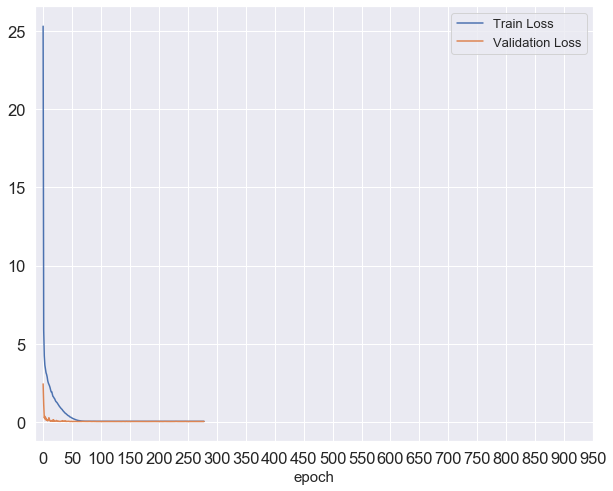

In [391]:
plt.figure(figsize=(10, 8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xticks(range(0, 1000, 50))
plt.xlabel("epoch", fontsize = 15)
plt.legend(['Train Loss', 'Validation Loss'], loc = 'upper right', fontsize = 13)
plt.show()

In [392]:
# transform the validation dataset
nn_predictions = model.predict(rescaled_X_test)

# check the difference
print(mean_squared_error(Y_test, nn_predictions))

0.05458895876842647


In [393]:
nn_predictions = nn_predictions.flatten()
nn_predictions

array([13.150505, 13.462471, 12.670827, ..., 13.138338, 12.558926,
       12.412964], dtype=float32)

In [394]:
nn_actual_y_test = np.exp(Y_test)
nn_actual_predicted = np.exp(nn_predictions)
nn_diff = abs(nn_actual_y_test - nn_actual_predicted)

nn_compare_actual_values = pd.DataFrame({'Test Data': nn_actual_y_test, 'Predicted Price' : nn_actual_predicted, 'Difference' : nn_diff})
nn_compare_actual_values = nn_compare_actual_values.astype(int)
nn_compare_actual_values.head(10)

,Test Data,Predicted Price,Difference
0,338999,514270,175270
1,700000,702549,2549
2,219000,318324,99324
3,564999,461591,103408
4,547500,499238,48261
5,590000,550168,39831
6,464999,516707,51707
7,199950,260331,60381
8,415500,457204,41704
9,564999,527397,37602


# Conclusions (Multiple Linear Regression versus Neural Network)

In [ ]:
# -> neural networks achieved the best result (taking in consideration mean_squared_error)
# -> the second linear regression obtained a better score, compared to the first linear regression
# (the one built with the assumptions taken into account)
# -> due to increased number of records (20k+), neural networks perform better